In [3]:

import vertexai
from google.cloud import bigquery
from tools import *


PROJECT_ID = "ml-demo-384110"  # @param {type:"string"}
vertexai.init(project=PROJECT_ID, location="us-central1")
client = bigquery.Client(project=PROJECT_ID)

%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [3]:
%%bigquery


create or replace table `immo_us_enriched.image_cloudvision_description_bench_1`  as  (

select 
ml_results.ml_generate_text_llm_result as description,
ml_generate_text_rai_result['blocked'] AS blocked,
ml_generate_text_rai_result['categories'] AS blocked_categories,
ml_generate_text_status,
uri,
attributes,
Id
FROM ML.GENERATE_TEXT(
MODEL `immo_us_enriched.bqml-llm_model`,
(
SELECT uri, attributes, Id,
CONCAT(
'You are a realestate agent, you know how to make attractive photos descriptions of real estate property based on a few words (ATTRIBUTES) based on the photo. ', 
'If the photo attributes are not clear return "N/A" ',
'ATTRIBUTES: ',
attributes,
". DESCRIPTION: "
) AS prompt
FROM `immo_us_enriched.image_cloudvision_labels_1k` 
),
STRUCT(0.6 AS temperature,
1000 AS max_output_tokens,
1.0 AS top_p,
40 AS top_k, 
TRUE AS flatten_json_output)
) as ml_results
)
;

Executing query with job ID: 5080b67c-e68e-440b-bad3-5c2b8fe6cd83
Query executing: 0.66s


ERROR:
 400 Syntax error: Unclosed string literal at [16:1]

Location: US
Job ID: 5080b67c-e68e-440b-bad3-5c2b8fe6cd83



In [5]:
%%bigquery df_description


select * from `immo_us_enriched.image_cloudvision_description_bench_1` limit 10


Downloading: 100%|██████████| 10/10 [00:02<00:00,  4.35rows/s]


In [6]:
df_description.head()


,description,blocked,blocked_categories,ml_generate_text_status,uri,attributes,Id
0,Warm and inviting living room in a cozy home w...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Furniture, Property, Window, Wood, Picture fra...",ag340369-383956652
1,Attractive real estate sign with electric blue...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Font, Electric blue",ag753296-376884499
2,The electric blue font on this sign is eye-cat...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Font, Electric blue",ag753296-383350085
3,3d rendering of the floor plan with isometric ...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Rectangle, Schematic, Font, Slope, Floor plan,...",ag753296-384815387
4,Modern building with large windows and skyligh...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Plant, Property, Building, Sky, Car, Land lot,...",apimo-7181337


,image,description,attributes
0,,"Warm and inviting living room in a cozy home with wood floors, fireplace, comfortable furniture and lots of natural light.","Furniture, Property, Window, Wood, Picture frame, Comfort, Fixture, Interior design, Lighting, Building"
1,,Attractive real estate sign with electric blue font.,"Font, Electric blue"
2,,The electric blue font on this sign is eye-catching and sure to draw attention to your property.,"Font, Electric blue"
3,,3d rendering of the floor plan with isometric view of the building and the surrounding area.,"Rectangle, Schematic, Font, Slope, Floor plan, Parallel, Building, Plan, Technical drawing"
4,,"Modern building with large windows and skylights in an urban design with trees, grass and a car in front.","Plant, Property, Building, Sky, Car, Land lot, Grass, Urban design, Tree, Window"
5,,"The font for the signage is elegant and inviting, drawing attention to the property.",Font
6,,3d rendering of an abstract floor plan with parallel lines in a technical drawing font.,"Schematic, Parallel, Font, Plan, Rectangle, Technical drawing"
7,,A car parked on the street in front of a residential building with blue windows and green plants on the porch.,"Wheel, Plant, Tire, Car, Sky, Vehicle, Building, Motor vehicle, Window, Residential area"
8,,3d rendering of an engineering plan for a new home,"Schematic, Font, Parallel, Engineering, Plan, Diagram, Pattern, Technical drawing, Paper"
9,,3d rendering of a modern building with a lot of green and a beautiful sky.,"Plant, Building, Wheel, Sky, Land lot, Grass, Adaptation, Real estate, Tree, Font"

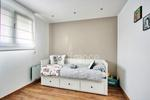
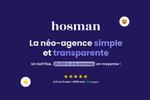
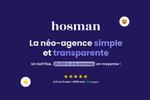
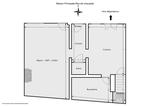
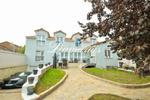
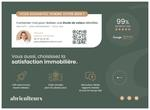
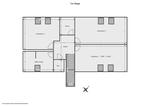
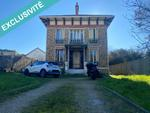
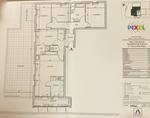
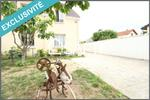

In [7]:
from tools import *

df_face_thumbnail = add_images_thumbnail_to_df(df_description)
# displaying PIL.Image objects embedded in dataframe
HTML(df_face_thumbnail[[ 'image', 'description', 
                        'attributes'
                         ]]
                        .to_html(formatters={'image': image_formatter}, escape=False))

In [8]:
%%bigquery


create or replace table `immo_us_enriched.image_cloudvision_description_bench_2`  as  (

select 
ml_results.ml_generate_text_llm_result as description,
ml_generate_text_rai_result['blocked'] AS blocked,
ml_generate_text_rai_result['categories'] AS blocked_categories,
ml_generate_text_status,
uri,
attributes,
Id
FROM ML.GENERATE_TEXT(
MODEL `immo_us_enriched.bqml-llm_model`,
(
SELECT uri, attributes, Id,
CONCAT(
'You are a realestate agent, you know how to make attractive photos descriptions of real estate property based on a few words (ATTRIBUTES) based on the photo. ', 
'If the photo attributes are not clear return "N/A" ',

# exemple 1
'.\n ATTRIBUTES: Furniture, Property, Window, Wood, Picture frame, Comfort, Fixture, Interior design, Lighting, Building', 
'.\n DESCRIPTION: Warm and inviting bedroom in a cozy home with wood floors, comfortable furniture and lots of natural light.', 

# exemple 2
'.\n ATTRIBUTES: Wheel, Plant, Tire, Car, Sky, Vehicle, Building, Motor vehicle, Window, Residential area', 
'.\n DESCRIPTION: A residential realestate property with a porch, a gardeen with beatifull plants and a car park spot in front.', 

# exemple 3
'.\n ATTRIBUTES: Rectangle, Technical drawing, Schematic, Font, Slope, Floor plan, bedroom, bathroom, first floor.', 
'.\n DESCRIPTION: Floor plan of the first floor with the detail of the size of bedrooms, bathroom,', 

# exemple 4
'.\n ATTRIBUTES: Font', 
'.\n DESCRIPTION: N/A', 

'.\n ATTRIBUTES: ',
attributes,
".\n DESCRIPTION: "
) AS prompt
FROM `immo_us_enriched.image_cloudvision_labels_1k` 
),
STRUCT(0.6 AS temperature,
1000 AS max_output_tokens,
1.0 AS top_p,
40 AS top_k, 
TRUE AS flatten_json_output)
) as ml_results
)
;

Query complete after 0.01s: 100%|██████████| 3/3 [00:00<00:00, 5893.64query/s]                        

: 

: 

In [16]:
%%bigquery df_description_2


select * from `immo_us_enriched.image_cloudvision_description_bench_2` where description !="" 
limit 300



Downloading: 100%|██████████| 300/300 [00:02<00:00, 118.56rows/s]


In [17]:
df_description_2

,description,blocked,blocked_categories,ml_generate_text_status,uri,attributes,Id
0,"A cozy living room with hardwood floors, comfo...",false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Furniture, Couch, Property, Wood, Interior des...",ag060811-378090001
1,Modern and stylish bathroom with purple walls ...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Mirror, Tap, Sink, Bathroom sink, Plumbing fix...",ag060811-378090001
2,A bedroom with a modern design featuring neutr...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Property, Furniture, Cabinetry, Comfort, Wood,...",ag060811-378090001
3,Attractive bathroom with a vintage mirrored va...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Mirror, Tap, Plumbing fixture, Sink, Building,...",ag060811-378090001
4,"A modern living room with a sectional couch, b...",false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Plant, Bookcase, Shelf, Wood, Shelving, Couch,...",ag060811-378090001
...,...,...,...,...,...,...,...
295,A comfortable living room with wooden floors a...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Building, Furniture, Comfort, Azure, Wood, Fix...",ag753296-383350085
296,A cozy orange studio couch in a modern living ...,false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Couch, Furniture, Property, Picture frame, Tab...",ag753296-383350085
297,"Beautiful kitchen with dark cabinets, laminate...",false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Property, Cabinetry, Wood, Countertop, Floorin...",ag753296-383350085
298,"Modern living room with laminate flooring, sof...",false,"[""Legal""]",,gs://ml-demo-384110-bucket/dataset/immo/images...,"Furniture, Couch, Comfort, Wood, Flooring, Liv...",ag753296-383350085


,image,description,attributes
0,,"A cozy living room with hardwood floors, comfortable couch and table.","Furniture, Couch, Property, Wood, Interior design, Flooring, Living room, Table, Comfort, Floor"
1,,Modern and stylish bathroom with purple walls and a wooden vanity..,"Mirror, Tap, Sink, Bathroom sink, Plumbing fixture, Bathroom cabinet, Bathroom, Wood, Purple, Interior design"
2,,A bedroom with a modern design featuring neutral colors and a warm wood bed frame..,"Property, Furniture, Cabinetry, Comfort, Wood, Lighting, Interior design, Bed frame, Floor, Flooring"
3,,Attractive bathroom with a vintage mirrored vanity and modern fixtures..,"Mirror, Tap, Plumbing fixture, Sink, Building, Bathroom, Fixture, Wood, Interior design, Bathroom cabinet"
4,,"A modern living room with a sectional couch, bookshelves, a television, and a few plants..","Plant, Bookcase, Shelf, Wood, Shelving, Couch, Interior design, Houseplant, Flowerpot, Television"
5,,"Modern living room with a fireplace, open floor plan, bookshelves and cozy furniture..","Property, Furniture, Bookcase, Shelf, Interior design, Comfort, House, Building, Floor, Shelving"
6,,Attractive bathroom with modern flooring and fixtures..,"Fixture, Bathroom, Interior design, Flooring, Floor, Plumbing fixture, Wall, Tile flooring, Real estate, Composite material"
7,,"A modern kitchen with white and wood cabinetry, stainless steel appliances, and a large island with seating.","Furniture, Window, Cabinetry, Wood, Shelving, Interior design, Shelf, Fixture, Home appliance, Flooring"
8,,"Attractive master suite with dark wood bed frame, comfy bedding and pillows and a large window with a beautiful view..","Furniture, Property, Building, Window, Comfort, Wood, Interior design, Bed frame, Textile, Lighting"
9,,Attractive living room with neutral wall color and wood floors. The furniture is comfortable and the lighting is bright and inviting..,"Property, Furniture, Comfort, Flooring, Interior design, Fixture, Floor, Wood, Cabinetry, Wall"

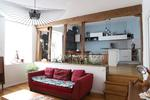
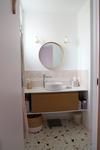
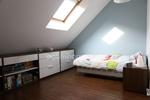
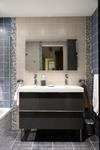
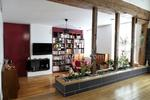
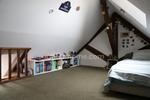
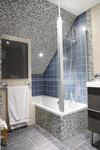
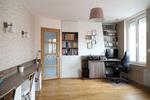
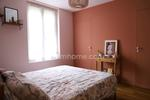
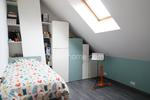
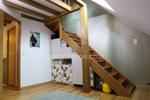
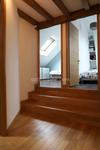
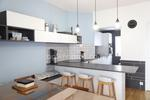
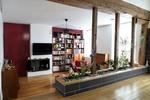
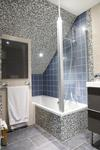
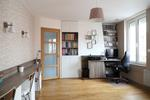
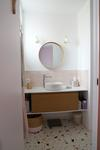
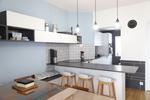
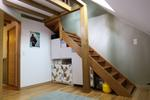
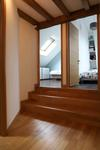
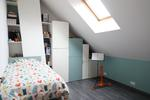
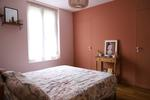
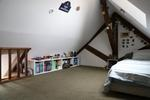
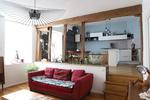
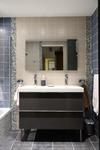
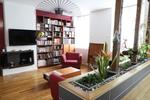
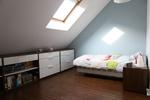
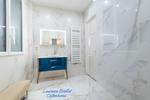
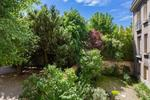
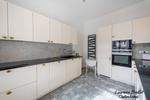
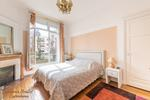
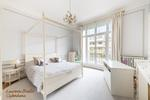
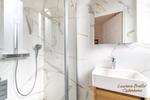
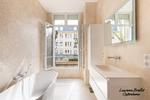
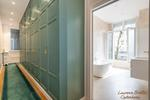
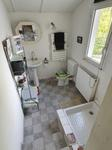
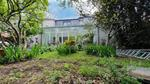
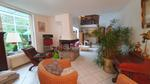
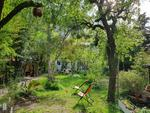
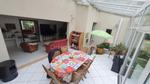
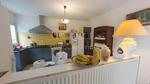
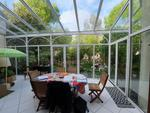
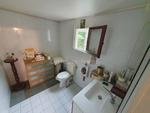
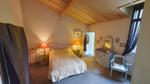
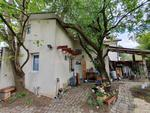
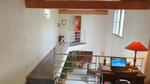
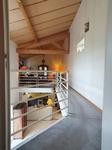
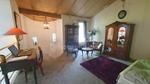
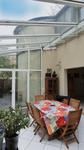
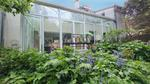
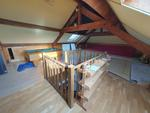
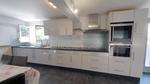
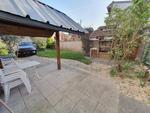
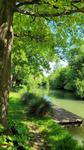
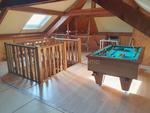
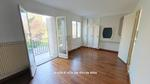
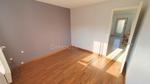
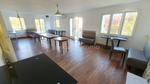
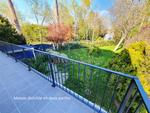
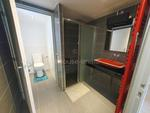
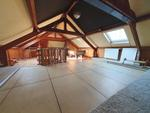
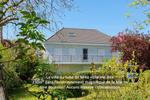
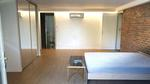
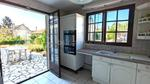
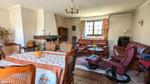
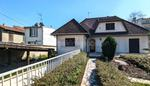
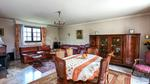
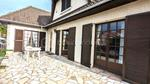
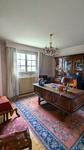
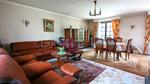
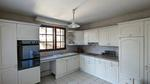
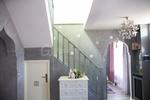
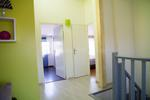
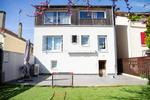
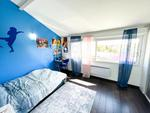
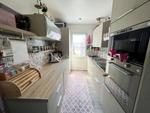
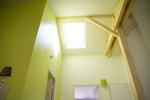
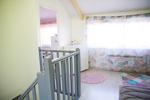
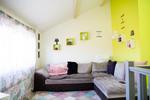
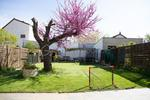
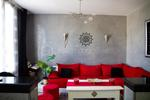
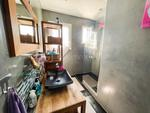
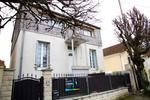
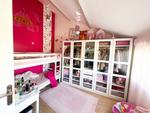
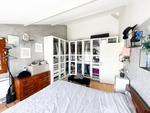
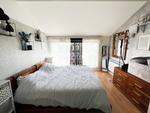
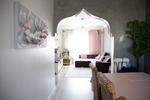
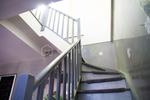
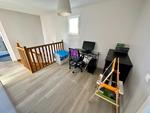
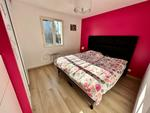
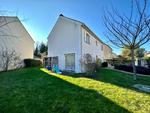
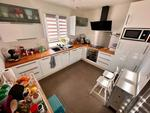
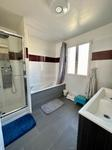
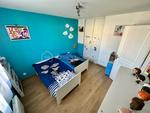
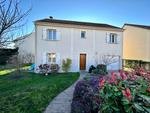
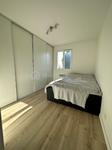
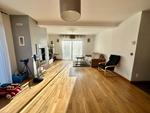
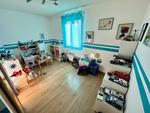
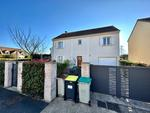
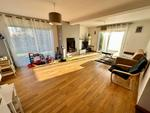
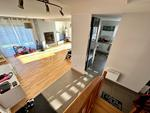
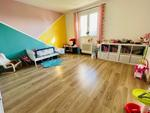
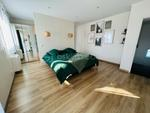
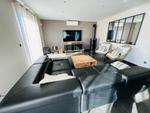
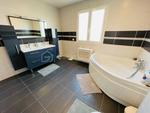
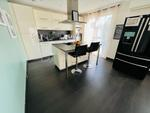
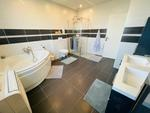
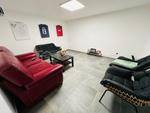
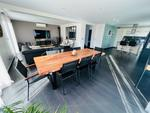
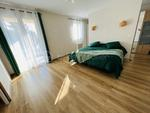
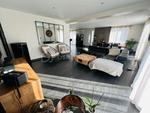
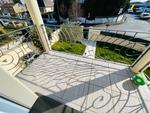
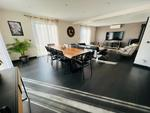
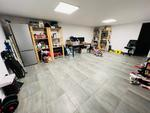
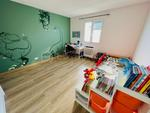
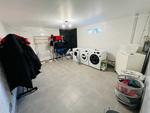
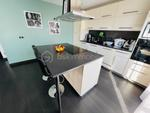
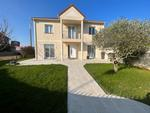
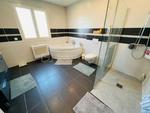
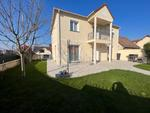
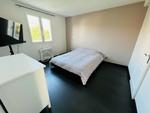
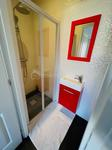
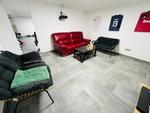
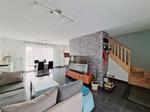
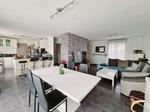
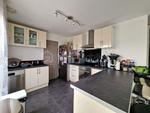
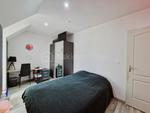
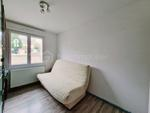
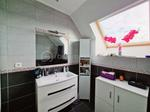
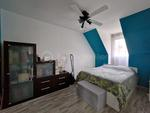
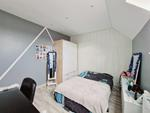
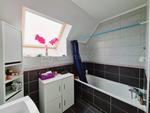
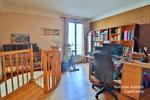
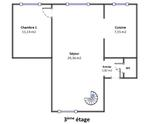
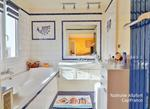
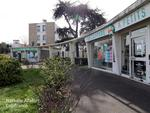
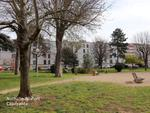
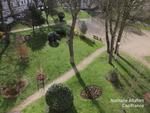
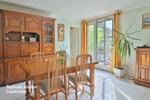
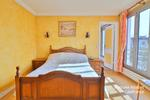
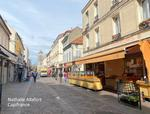
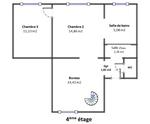
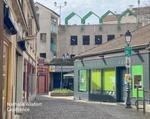
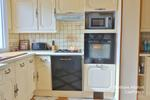
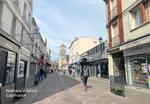
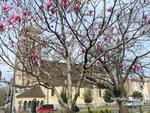
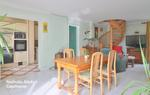
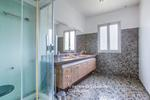
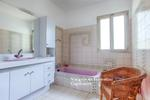
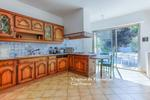
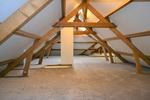
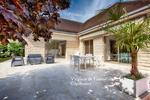
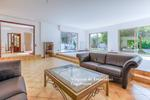
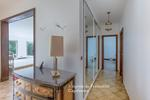
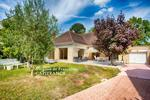
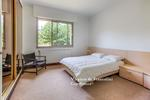
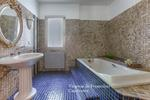
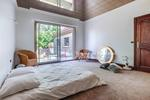
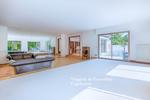
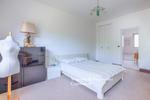
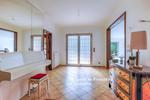
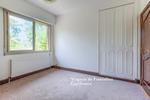
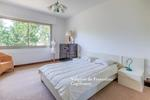
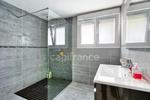
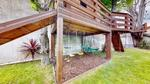
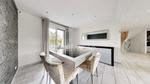
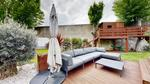
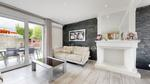
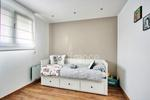
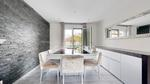
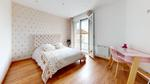
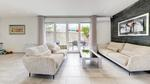
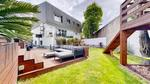
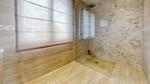
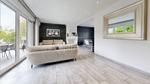
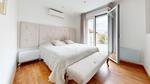
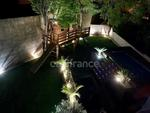
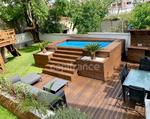
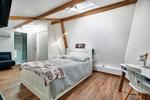
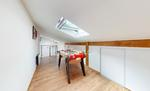
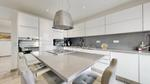
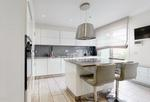
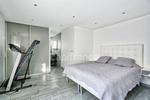
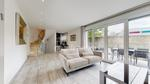
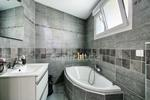
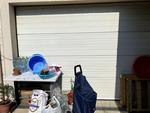
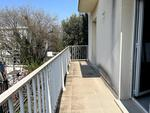
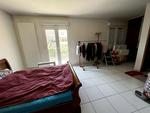
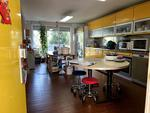
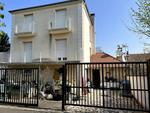
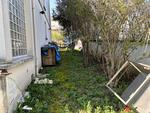
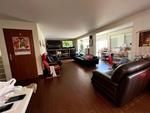
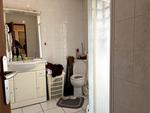
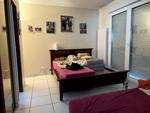
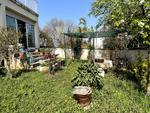
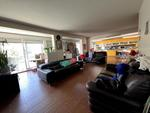
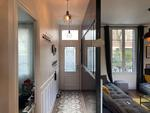
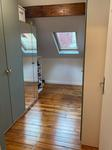
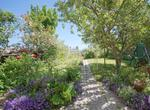
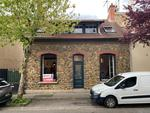
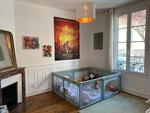
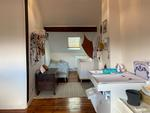
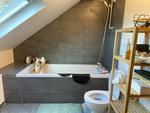
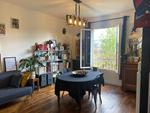
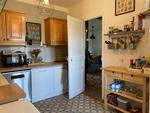
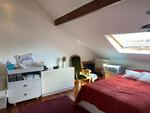
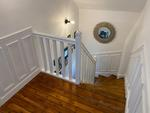
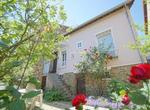
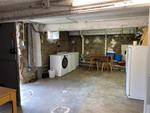
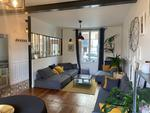
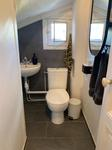
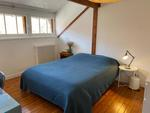
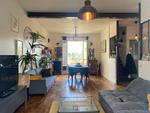
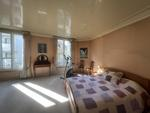
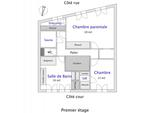
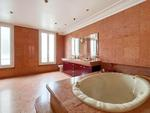
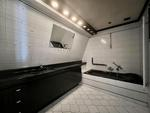
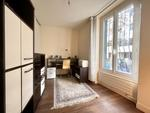
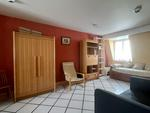
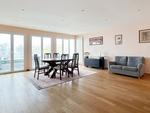
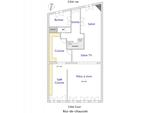
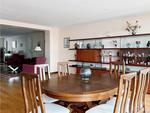
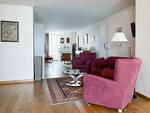
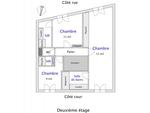
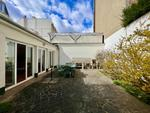
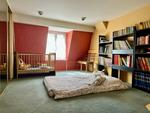
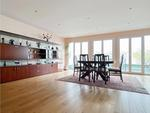
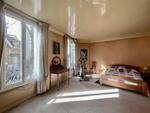
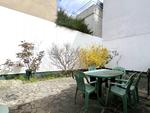
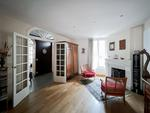
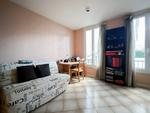
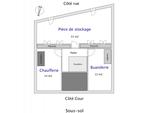
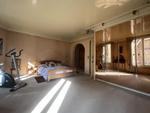
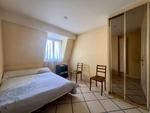
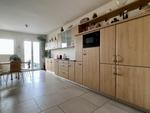
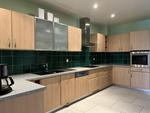
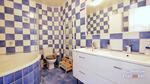
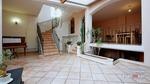
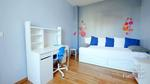
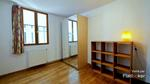
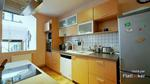
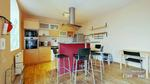
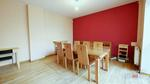
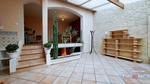
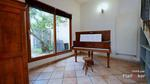
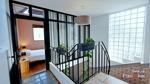
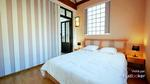
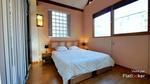
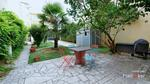
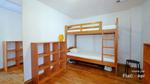
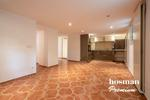
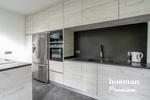
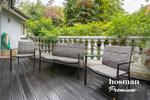
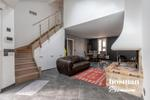
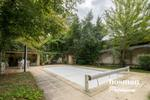
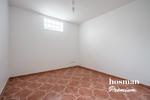
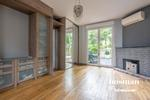
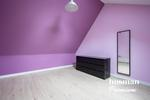
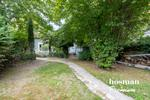
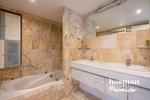
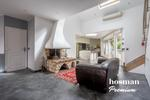
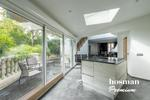
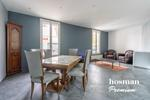
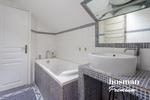
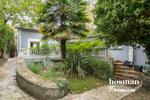
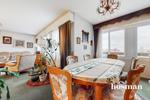
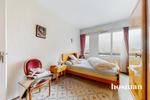
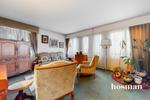
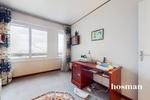
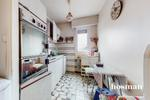
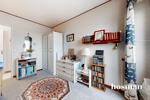
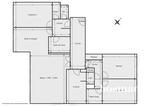
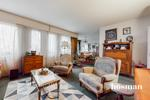
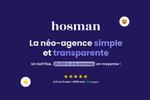
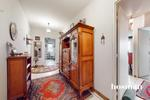
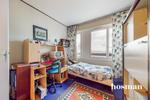
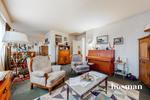
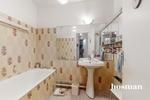
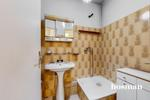
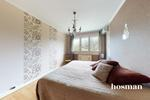
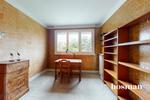
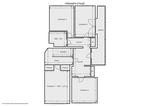
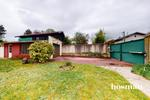
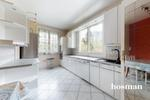
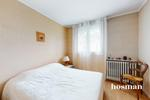
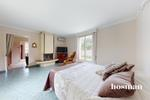
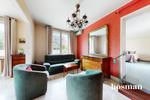
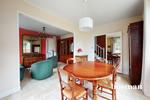
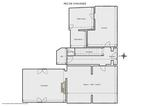
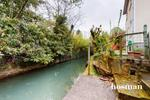
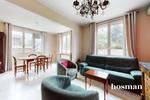
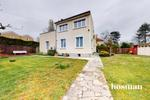
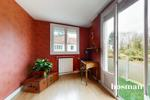
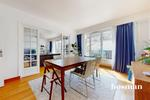
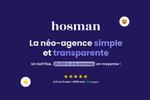
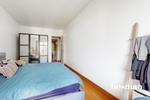
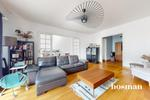
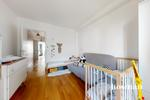
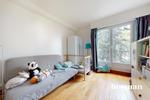
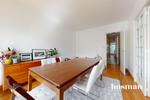

In [18]:

# displaying PIL.Image objects embedded in dataframe
HTML(add_images_thumbnail_to_df(df_description_2)[[ 'image', 'description', 
                        'attributes'
                         ]]
                        .to_html(formatters={'image': image_formatter}, escape=False))